<a href="https://colab.research.google.com/github/MilindiSenevirathne/COVID-19_Test/blob/main/map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import pandas as pd

In [27]:
df = pd.read_csv('/content/sample_data/test1.csv', sep = r'\s*,\s*', engine = 'python')
df

,country,capital,longitude,latitude
0,Mali,Bamako,-8.00,12.63
1,Nigeria,Abuja,7.53,8.93
2,Mauritania,Nouakchot,-15.95,18.07
3,Benin,Port-Novo,2.31,9.30
4,Niger,Niamey,13.51,2.12


In [28]:
df_geo = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(
    df.longitude, df.latitude
))

df_geo

,country,capital,longitude,latitude,geometry
0,Mali,Bamako,-8.00,12.63,POINT (-8.00000 12.63000)
1,Nigeria,Abuja,7.53,8.93,POINT (7.53000 8.93000)
2,Mauritania,Nouakchot,-15.95,18.07,POINT (-15.95000 18.07000)
3,Benin,Port-Novo,2.31,9.30,POINT (2.31000 9.30000)
4,Niger,Niamey,13.51,2.12,POINT (13.51000 2.12000)


In [29]:
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<ipython-input-29-c734f8c498f7>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Text(0.5, 1.0, 'WA Countries')

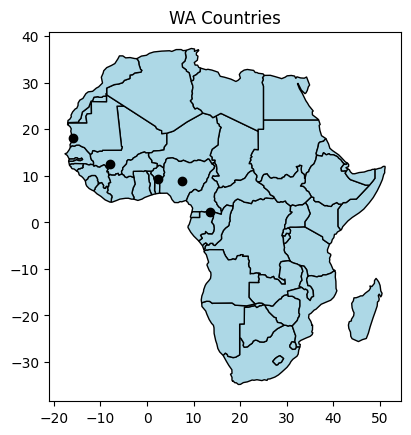

In [30]:
axis = world_data[world_data.continent == 'Africa'].plot(
    color = 'lightblue', edgecolor = 'black'
)

df_geo.plot(ax = axis, color = 'black')
plt.title('WA Countries')

In [32]:
f = px.choropleth(df, locationmode = 'country names', locations = df['country'], scope = 'africa', color = df['country'])
f.show()